In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from math import radians, cos, sin, asin, sqrt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#pip install pandas numpy scikit-learn matplotlib seaborn joblib geopy


In [3]:
df = pd.read_csv("uber.csv")

print(f"Original dataset shape: {df.shape}")
df.head()
#1. Load Dataset

Original dataset shape: (200000, 9)


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df = df.drop(['Unnamed: 0', 'key', 'pickup_datetime'], axis = 1)
df.dropna(inplace=True)

In [5]:
import seaborn as sns

<Axes: ylabel='fare_amount'>

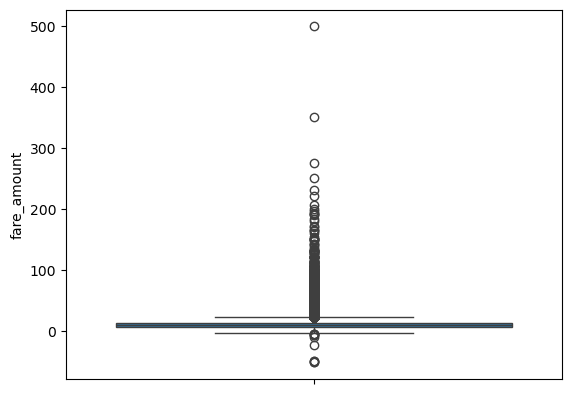

In [6]:
sns.boxplot(df['fare_amount'])

In [7]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x1b0691ace60>,
 'caps': [<matplotlib.lines.Line2D at 0x1b0691ad430>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b0691acbc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b0691ad9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b0691adc70>],
 'means': []}

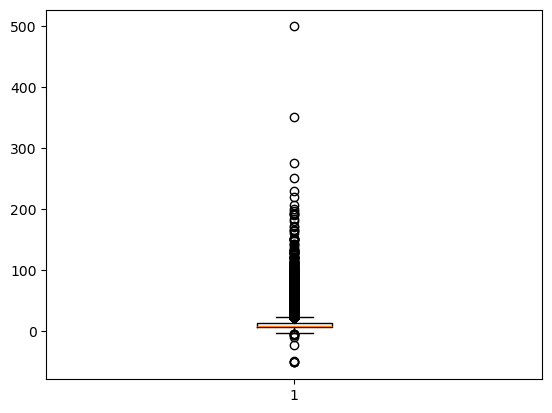

In [8]:
plt.boxplot(df['fare_amount'])

In [9]:
low = df['fare_amount'].quantile(0.05)
high = df['fare_amount'].quantile(0.95)
df = df[(df['fare_amount'] > low) & (df['fare_amount'] < high)]

In [10]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x1b068c4cf50>,
 'caps': [<matplotlib.lines.Line2D at 0x1b068c4e540>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b0691d5370>],
 'medians': [<matplotlib.lines.Line2D at 0x1b068c4eab0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b068c4ed80>],
 'means': []}

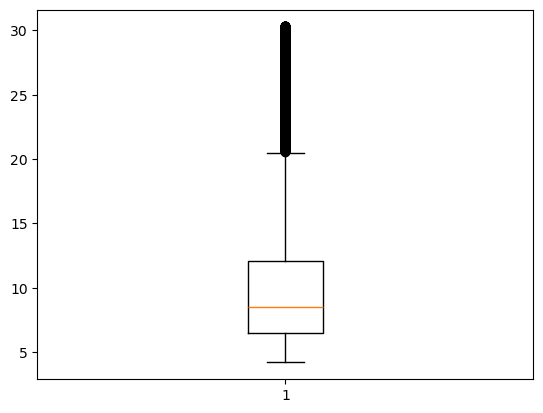

In [11]:
plt.boxplot(df['fare_amount'])

In [12]:
print("\nCorrelation with fare_amount:")
corr = df.corr()['fare_amount'].sort_values(ascending=False)
print(corr)


Correlation with fare_amount:
fare_amount          1.000000
passenger_count      0.005760
pickup_longitude     0.003817
dropoff_longitude    0.002148
pickup_latitude     -0.001502
dropoff_latitude    -0.004022
Name: fare_amount, dtype: float64


<Axes: >

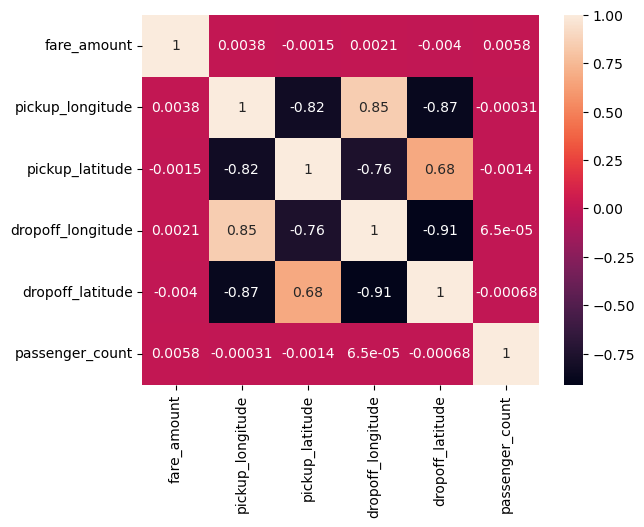

In [13]:
corr = df.corr()
sns.heatmap(corr, annot=True)

In [14]:
import numpy as np

In [15]:
df['euclidean_distance'] = np.sqrt(
    (df['dropoff_longitude'] - df['pickup_longitude'])**2 +
    (df['dropoff_latitude'] - df['pickup_latitude'])**2
)


In [16]:
df['distance'] = df['euclidean_distance']


In [17]:
print(df.columns)


Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'euclidean_distance', 'distance'],
      dtype='object')


In [18]:
df = df.dropna(subset=['pickup_longitude', 'pickup_latitude', 
                       'dropoff_longitude', 'dropoff_latitude', 
                       'fare_amount'])

In [19]:
features = ['distance', 'passenger_count']
X = df[features]
y = df['fare_amount']

# --- Split the data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [21]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("Linear Regression Results:")
print(f"R² Score: {r2_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")
print(f"MAE: {mae_lr:.4f}")

Linear Regression Results:
R² Score: 0.0001
RMSE: 5.1528
MAE: 3.9005


In [22]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("\nRandom Forest Regression Results:")
print(f"R² Score: {r2_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")



Random Forest Regression Results:
R² Score: 0.6246
RMSE: 3.1573
MAE: 2.2010


In [23]:
# Example test case
pickup_longitude = -73.985428
pickup_latitude = 40.748817
dropoff_longitude = -73.985135
dropoff_latitude = 40.758896
passenger_count = 2

# Approximate Euclidean distance (same formula you used)
distance = np.sqrt(
    (dropoff_longitude - pickup_longitude)**2 +
    (dropoff_latitude - pickup_latitude)**2
)

# Create input for prediction
input_data = pd.DataFrame([[distance, passenger_count]], 
                          columns=['distance', 'passenger_count'])

# Predict fare
fare_lr = lr_model.predict(input_data)[0]
fare_rf = rf_model.predict(input_data)[0]

print(f"\nPredicted Fare (Linear Regression): ${fare_lr:.2f}")
print(f"Predicted Fare (Random Forest): ${fare_rf:.2f}")



Predicted Fare (Linear Regression): $10.02
Predicted Fare (Random Forest): $5.61
